In [3]:
import fbma
import pandas as pd

In [4]:
fbma.msgs.head()

,members,sender,text,time
0,"['Kevin Wang', 'Walton Wu']",Kevin Wang,don't take calcium supplements,"Monday, June 13, 2011 at 9:20pm PDT"
1,"['Kevin Wang', 'Walton Wu']",Kevin Wang,my doctor was all,"Monday, June 13, 2011 at 9:20pm PDT"
2,"['Kevin Wang', 'Walton Wu']",Kevin Wang,i dunno,"Monday, June 13, 2011 at 9:20pm PDT"
3,"['Kevin Wang', 'Walton Wu']",Kevin Wang,asdf,"Monday, June 13, 2011 at 9:18pm PDT"
4,"['Kevin Wang', 'Walton Wu']",Walton Wu,lol,"Monday, June 13, 2011 at 9:18pm PDT"


In [5]:
%matplotlib inline

In [6]:
msgs = fbma.msgs

In [7]:
kevin = msgs[msgs['sender'] == "Kevin Wang"]

In [8]:
kevin.head()

,members,sender,text,time
0,"['Kevin Wang', 'Walton Wu']",Kevin Wang,don't take calcium supplements,"Monday, June 13, 2011 at 9:20pm PDT"
1,"['Kevin Wang', 'Walton Wu']",Kevin Wang,my doctor was all,"Monday, June 13, 2011 at 9:20pm PDT"
2,"['Kevin Wang', 'Walton Wu']",Kevin Wang,i dunno,"Monday, June 13, 2011 at 9:20pm PDT"
3,"['Kevin Wang', 'Walton Wu']",Kevin Wang,asdf,"Monday, June 13, 2011 at 9:18pm PDT"
7,"['Kevin Wang', 'Walton Wu']",Kevin Wang,lol,"Monday, June 13, 2011 at 9:18pm PDT"


In [9]:
others = msgs[msgs['sender'] != "Kevin Wang"]

In [10]:
others.head()

,members,sender,text,time
4,"['Kevin Wang', 'Walton Wu']",Walton Wu,lol,"Monday, June 13, 2011 at 9:18pm PDT"
5,"['Kevin Wang', 'Walton Wu']",Walton Wu,lt helps,"Monday, June 13, 2011 at 9:18pm PDT"
6,"['Kevin Wang', 'Walton Wu']",Walton Wu,want some calcium pills?,"Monday, June 13, 2011 at 9:18pm PDT"
9,"['Kevin Wang', 'Walton Wu']",Walton Wu,l'm pretty much recovered,"Monday, June 13, 2011 at 9:18pm PDT"
10,"['Kevin Wang', 'Walton Wu']",Walton Wu,l'm surprised you aren't recovered,"Monday, June 13, 2011 at 9:18pm PDT"


In [11]:
from collections import Counter
def make_words(df, case_sensitive = False):
    words = Counter()
    txt = df["text"]
    if case_sensitive == False:
        txt = txt.str.lower()
    #print(txt.str.split())
    txt.str.split().apply(words.update)
    return words

In [12]:
kevin = kevin[1:]

In [74]:
others[others.text.isnull()]
#kevin[kevin.text.isnull()]

,members,sender,text,time
293311,"['Potragent Phuong', 'Kevin Wang', 'Arthur Or'...",Arthur Or,NaN,"Thursday, May 8, 2014 at 3:23am PDT"
342648,"['Potragent Phuong', 'Kevin Wang', 'Arthur Or'...",Arthur Or,NaN,"Monday, August 25, 2014 at 11:31pm PDT"
432990,"['Potragent Phuong', 'Kevin Wang', 'Arthur Or'...",Arthur Or,NaN,"Wednesday, May 6, 2015 at 8:08pm PDT"
506433,"['Ivan Law', 'Jeremy Yang', 'Michelle Tjoa', '...",Royal Siu,NaN,"Wednesday, November 11, 2015 at 11:25pm PST"


In [ ]:
others[]

In [68]:
kwords = make_words(kevin)
owords = make_words(others)

TypeError: 'float' object is not iterable

In [16]:
#kwords

In [17]:
def laugh_words(words):
    for word, amount in sorted(words.items(), key=lambda x: x[1], reverse = True):
        if (set(word) in ({"h", "a"}, {"l", "o"})) or (word[:4] == "rofl"):
            if word not in {'ah'}:
                yield (word, amount)

In [49]:
lwords = pd.DataFrame(list(laugh_words(kwords)))

In [19]:
lwords.head()

,0,1
0,lol,7628
1,haha,1004
2,rofl,560
3,hahaha,342
4,hahahaha,267


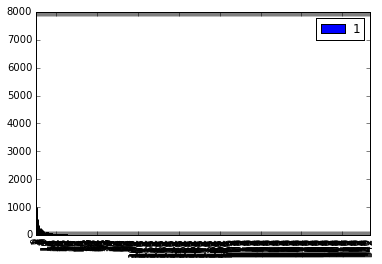

In [20]:
lwords.plot(kind="bar")

In [21]:
lwords

,0,1
0,lol,7628
1,haha,1004
2,rofl,560
3,hahaha,342
4,hahahaha,267
5,lololol,245
6,lolololol,206
7,hahahahah,168
8,hahahah,142
9,lollll,124


In [22]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [23]:
print_full(lwords)

                                                     0     1
0                                                  lol  7628
1                                                 haha  1004
2                                                 rofl   560
3                                               hahaha   342
4                                             hahahaha   267
5                                              lololol   245
6                                            lolololol   206
7                                            hahahahah   168
8                                              hahahah   142
9                                               lollll   124
10                                          hahahahaha   121
11                                         lololololol    93
12                                         hahahahahah    92
13                                             lolllll    76
14                                               lolll    66
15                      

In [24]:
type(kwords)

collections.Counter

In [25]:
sum(kwords.values())

594772

In [26]:
lwords[1].sum()

12426

In [27]:
lwords[1].sum()/sum(kwords.values())
#proportion of the words that I say that are laughter

0.020892039302455395

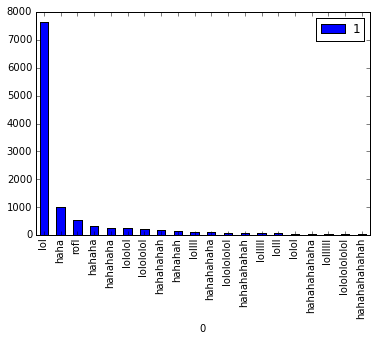

In [65]:
lwords = lwords.set_index(0)
lwords[:20].plot(kind="bar")

In [66]:
#x = lwords[:20].plot(kind="bar")
#x.set_xticklabels(lwords[0])

In [67]:
kwords['lmao'], 

6